This notebook generates figures illustrating the validation of the non-trivial temporal evolution as described in Supplementary Material Section 7.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

from allen_cahn_equation import (
    compute_exact_solution_random_ic_vary_Nx,
    visualize_spline_ic,
    plot_both_grids,
)

from data_processing import (
    SimpleSerializerSettings, scale_2d_array, unscale_2d_array,
    serialize_2d_integers, deserialize_2d_integers, extract_training_and_test
)

# Set random seeds for reproducibility
seed = 1
random.seed(seed)
np.random.seed(seed)

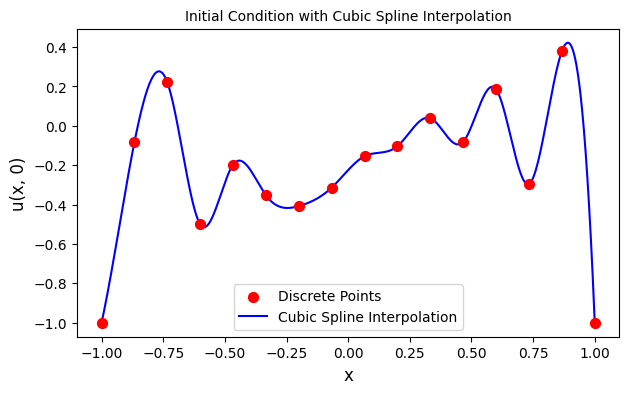

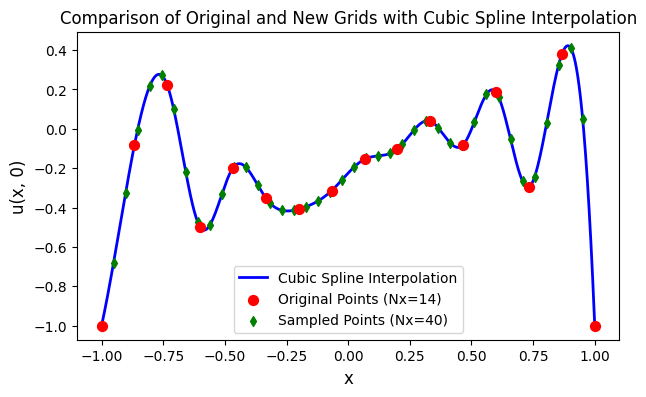

In [2]:
# Define parameters for the Allen-Cahn equation
L = 2       # Length of the spatial domain
k = 0.001   # Thermal diffusivity
T = 0.5     # Total simulation time
Nx = 14     # Number of spatial steps (excluding boundary points)
Nt = 50     # Total simulation time
dx = L/(Nx+1)
dt = T/Nt

# Generate random initial conditions and setup grids
init_cond_random = np.random.uniform(-0.5, 0.5, size=Nx)
fig = visualize_spline_ic(L, Nx, init_cond_random)
Nx_original = Nx
Nx_new = 40
fig, cs, init_cond_random_new = plot_both_grids(L, Nx_original, Nx_new, init_cond_random)
# Serialization setup
settings = SimpleSerializerSettings(space_sep=",", time_sep=";")
# Compute exact solution and test serialization pipeline
u_exact = compute_exact_solution_random_ic_vary_Nx(L, k, T, Nx, Nt, spline_obj=cs)
u_exact_scaled, vmin_exact, vmax_exact = scale_2d_array(u_exact)
u_exact_serialized = serialize_2d_integers(u_exact_scaled, settings)
u_exact_parsed = deserialize_2d_integers(u_exact_serialized, settings)
u_exact_unscaled = unscale_2d_array(u_exact_parsed, vmin_exact, vmax_exact)

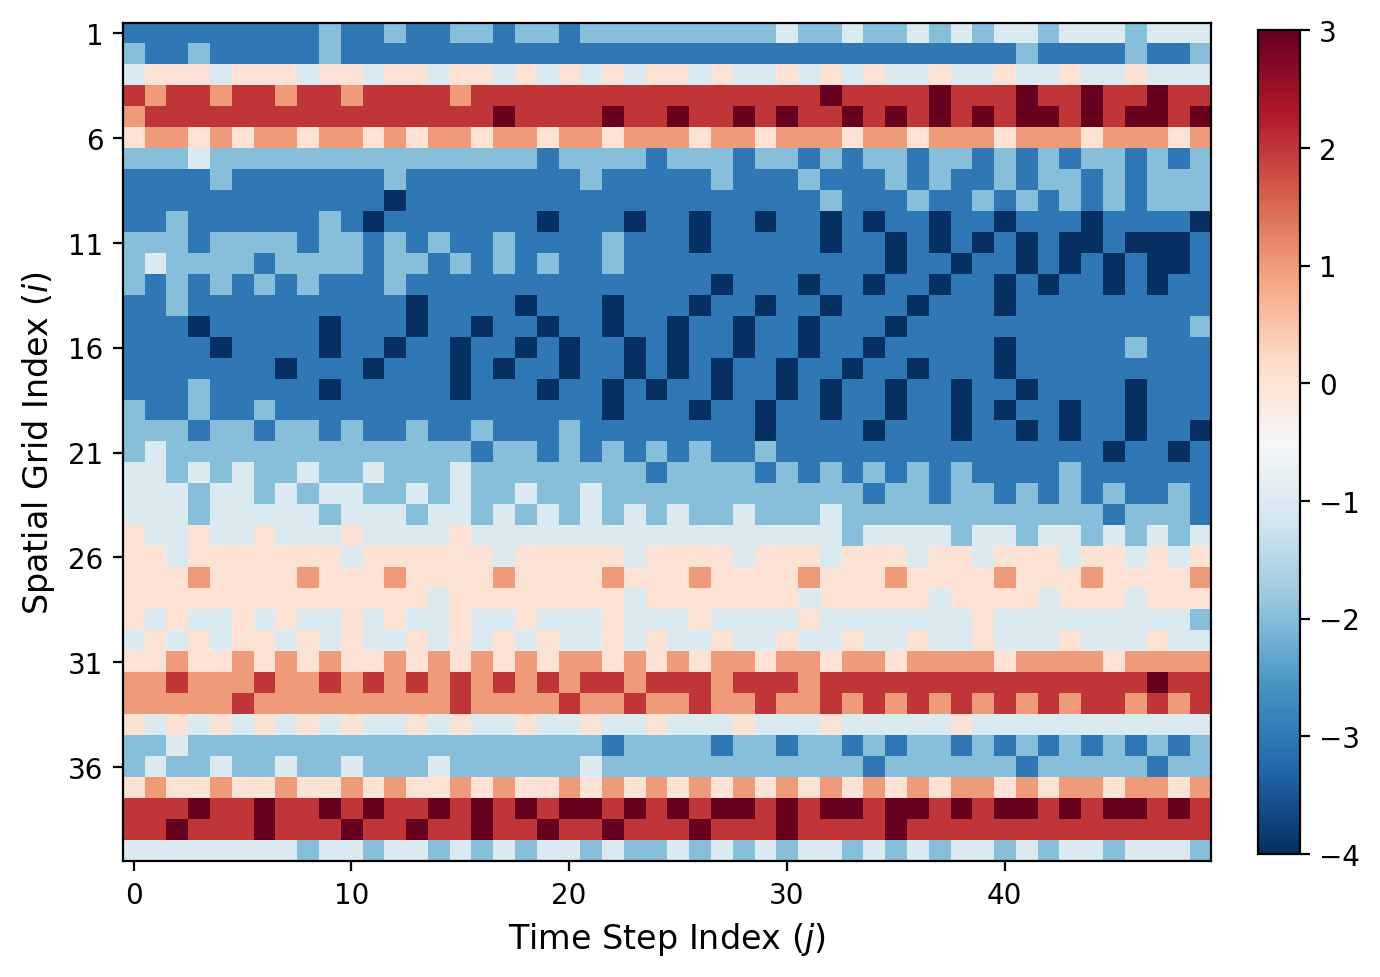

In [3]:
u_exact_fine = compute_exact_solution_random_ic_vary_Nx(L, k, T, Nx_new, Nt, spline_obj=cs)
u_exact_fine_scaled, _, _ = scale_2d_array(u_exact_fine)
# Compute temporal differences
temporal_diffs = np.diff(u_exact_fine_scaled, axis=0)
fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=200)
im = ax.imshow(temporal_diffs.T, aspect='auto', cmap='RdBu_r', interpolation='nearest')
ax.set_xlabel('Time Step Index $(j)$', fontsize=12)
ax.set_ylabel('Spatial Grid Index $(i)$', fontsize=12)
y_ticks = ax.get_yticks()
y_ticks = y_ticks[(y_ticks >= 0) & (y_ticks < temporal_diffs.shape[1])]
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(tick + 1) for tick in y_ticks])
cbar = plt.colorbar(im, ax=ax, fraction=0.035, pad=0.04)
cbar.ax.tick_params(labelsize=10)
ax.tick_params(axis='both', which='major', labelsize=10)
plt.tight_layout()
plt.show()